In [2]:
DATASET_DIR = "cat-and-dog"           # root that contains training_set/ and test_set/ (or the zip extraction folder)
TRAIN_SUB = "training_set"            # folder name inside DATASET_DIR for training images
TEST_SUB  = "test_set"                # folder name inside DATASET_DIR for test images

IMG_SIZE = 64         # small for laptop (64 or 96); must match model input
BATCH_SIZE = 8        # small batch to reduce memory/CPU
EPOCHS = 2            # start small; increase if laptop is stable
MAX_STEPS = 20        # limit steps_per_epoch (keeps each epoch short)
RANDOM_SEED = 42

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)


In [5]:
import os

train_dir = "cat-and-dog/training_set"
test_dir = "cat-and-dog/test_set"

print("Contents of training_set:", os.listdir(train_dir))
print("Contents of test_set:", os.listdir(test_dir))

print("\nInside training_set/cats:", os.listdir(os.path.join(train_dir, "cats"))[:10])
print("Inside training_set/dogs:", os.listdir(os.path.join(train_dir, "dogs"))[:10])


Contents of training_set: ['training_set', 'cats', 'dogs']
Contents of test_set: ['test_set', 'cats', 'dogs']

Inside training_set/cats: []
Inside training_set/dogs: []


In [7]:
import os

deep_train_cats = "cat-and-dog/training_set/training_set/cats"
deep_train_dogs = "cat-and-dog/training_set/training_set/dogs"

deep_test_cats = "cat-and-dog/test_set/test_set/cats"
deep_test_dogs = "cat-and-dog/test_set/test_set/dogs"

print("Deep train cats:", len(os.listdir(deep_train_cats)))
print("Deep train dogs:", len(os.listdir(deep_train_dogs)))
print("Deep test cats:", len(os.listdir(deep_test_cats)))
print("Deep test dogs:", len(os.listdir(deep_test_dogs)))


Deep train cats: 4001
Deep train dogs: 4006
Deep test cats: 1012
Deep test dogs: 1013


In [8]:
import shutil

# Correct training cats
for file in os.listdir(deep_train_cats):
    shutil.move(os.path.join(deep_train_cats, file), "cat-and-dog/training_set/cats")

# Correct training dogs
for file in os.listdir(deep_train_dogs):
    shutil.move(os.path.join(deep_train_dogs, file), "cat-and-dog/training_set/dogs")

# Correct test cats
for file in os.listdir(deep_test_cats):
    shutil.move(os.path.join(deep_test_cats, file), "cat-and-dog/test_set/cats")

# Correct test dogs
for file in os.listdir(deep_test_dogs):
    shutil.move(os.path.join(deep_test_dogs, file), "cat-and-dog/test_set/dogs")

print("✅ Images moved back into correct folders")


✅ Images moved back into correct folders


In [9]:
print("Train cats:", len(os.listdir("cat-and-dog/training_set/cats")))
print("Train dogs:", len(os.listdir("cat-and-dog/training_set/dogs")))
print("Test cats:", len(os.listdir("cat-and-dog/test_set/cats")))
print("Test dogs:", len(os.listdir("cat-and-dog/test_set/dogs")))


Train cats: 4001
Train dogs: 4006
Test cats: 1012
Test dogs: 1013


In [10]:
import os

print("Train cats:", len(os.listdir("cat-and-dog/training_set/cats")))
print("Train dogs:", len(os.listdir("cat-and-dog/training_set/dogs")))
print("Test cats:", len(os.listdir("cat-and-dog/test_set/cats")))
print("Test dogs:", len(os.listdir("cat-and-dog/test_set/dogs")))


Train cats: 4001
Train dogs: 4006
Test cats: 1012
Test dogs: 1013


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "cat-and-dog/training_set"
test_dir = "cat-and-dog/test_set"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 3 classes.
Found 2023 images belonging to 3 classes.


In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,  # use fewer steps for testing
    epochs=2,            # start small to check
    validation_data=test_generator,
    validation_steps=20
)


Epoch 1/2


2025-09-03 21:52:53.909662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 0.7020 - accuracy: 0.5381

2025-09-03 21:54:12.831145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 87s 2s/step - loss: 0.7020 - accuracy: 0.5381 - val_loss: 0.6978 - val_accuracy: 0.5297
Epoch 2/2
50/50 [==============================] - 87s 2s/step - loss: 0.6614 - accuracy: 0.6112 - val_loss: 0.6210 - val_accuracy: 0.6547


In [14]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])


Final Training Accuracy: 0.6112499833106995
Final Validation Accuracy: 0.6546875238418579
Final Training Loss: 0.6614137887954712
Final Validation Loss: 0.6209743022918701


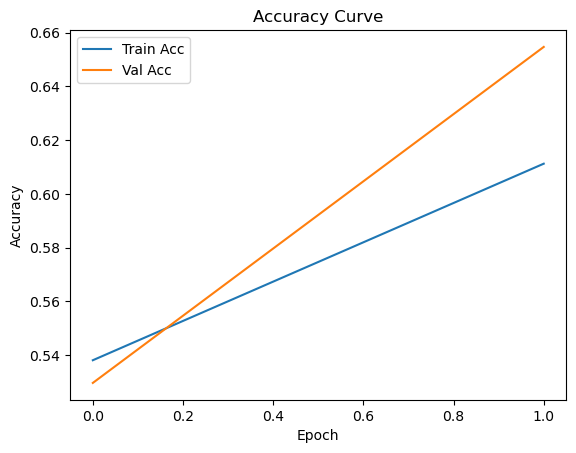

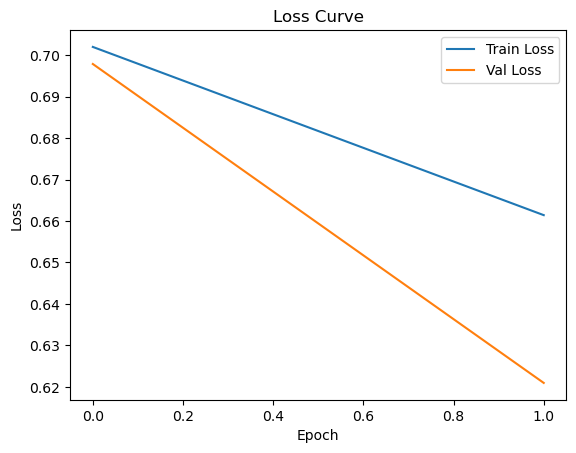

In [15]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


In [17]:
from tensorflow.keras.preprocessing import image


In [19]:
img_path = "cat-and-dog/test_set/cats/cat.1.jpg"


In [20]:
import os

print("Sample test cat images:", os.listdir("cat-and-dog/test_set/cats")[:10])
print("Sample test dog images:", os.listdir("cat-and-dog/test_set/dogs")[:10])
NameError                                 Traceback (most recent call last)
Cell In[34], line 2
      1 history = model.fit(
----> 2     training_set,
      3     validation_data=test_set,
      4     epochs=20,   # increase from 5 → 20
      5     steps_per_epoch=100,
      6     validation_steps=50
      7 )

NameError: name 'training_set' is not defined



Sample test cat images: ['cat.4813.jpg', 'cat.4396.jpg', 'cat.4744.jpg', 'cat.4708.jpg', 'cat.4617.jpg', 'cat.4447.jpg', 'cat.4784.jpg', 'cat.4048.jpg', 'cat.4018.jpg', 'cat.4507.jpg']
Sample test dog images: ['dog.4394.jpg', 'dog.4424.jpg', 'dog.4713.jpg', 'dog.4882.jpg', 'dog.4850.jpg', 'dog.4604.jpg', 'dog.4377.jpg', 'dog.4841.jpg', 'dog.4557.jpg', 'dog.4400.jpg']


In [27]:
img = image.load_img(img_path, target_size=(150,150))  # use 150x150 instead of 64x64


In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Pick an existing image
img_path = "cat-and-dog/test_set/cats/cat.4813.jpg"

# Check file exists
print("File exists? ", os.path.exists(img_path))

# Load and preprocess with correct size (150x150)
img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Prediction
prediction = model.predict(img_array)[0][0]

if prediction > 0.5:
    print("Prediction: Cat")
else:
    print("Prediction: Dog")


File exists?  True
1/1 [==============================] - 0s 42ms/step
Prediction: Cat


1/1 [==============================] - 0s 55ms/step


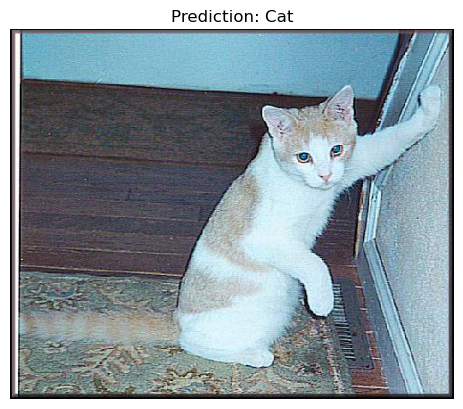

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# same image path
img_path = "cat-and-dog/test_set/cats/cat.4001.jpg"   # change if needed

# load and preprocess
img = image.load_img(img_path, target_size=(150,150))  # must match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
NameError                                 Traceback (most recent call last)
Cell In[34], line 2
      1 history = model.fit(
----> 2     training_set,
      3     validation_data=test_set,
      4     epochs=20,   # increase from 5 → 20
      5     steps_per_epoch=100,
      6     validation_steps=50
      7 )

NameError: name 'training_set' is not defined


# prediction
prediction = model.predict(img_array)[0][0]

label = "Cat" if prediction > 0.5 else "Dog"

# show image with prediction
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title(f"Prediction: {label}")
plt.show()


In [36]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])


Final Training Accuracy: 0.6112499833106995
Final Validation Accuracy: 0.6546875238418579
Final Training Loss: 0.6614137887954712
Final Validation Loss: 0.6209743022918701
